In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [5]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [6]:
train_images,test_images=train_images/255.0,test_images/255.0

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

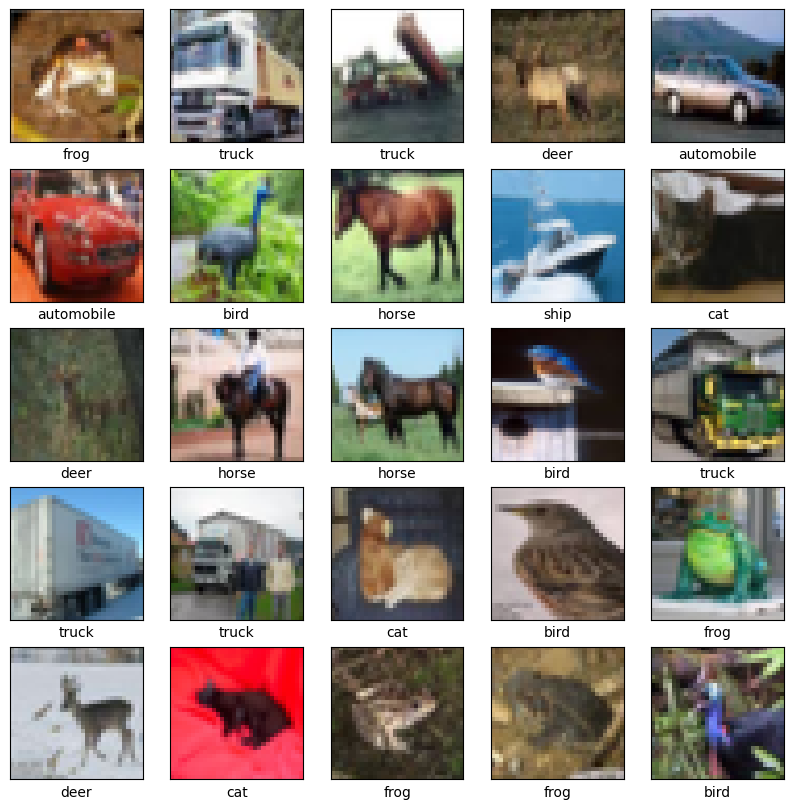

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap= plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [9]:
from tensorflow.keras import Input

model = models.Sequential()
model.add(Input(shape=(32,32,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))



In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images,train_labels,epochs=15,validation_data=(test_images,test_labels))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.3428 - loss: 1.7716 - val_accuracy: 0.5478 - val_loss: 1.2502
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 66ms/step - accuracy: 0.5751 - loss: 1.1948 - val_accuracy: 0.6258 - val_loss: 1.0617
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 70ms/step - accuracy: 0.6378 - loss: 1.0236 - val_accuracy: 0.6362 - val_loss: 1.0293
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.6739 - loss: 0.9276 - val_accuracy: 0.6378 - val_loss: 1.0473
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.6984 - loss: 0.8569 - val_accuracy: 0.6685 - val_loss: 0.9467
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 52ms/step - accuracy: 0.7189 - loss: 0.7946 - val_accuracy: 0.6795 - val_loss: 0.9198
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.7378 - loss: 0.7419 - val_accuracy: 0.7048 - val_loss: 0.8449
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


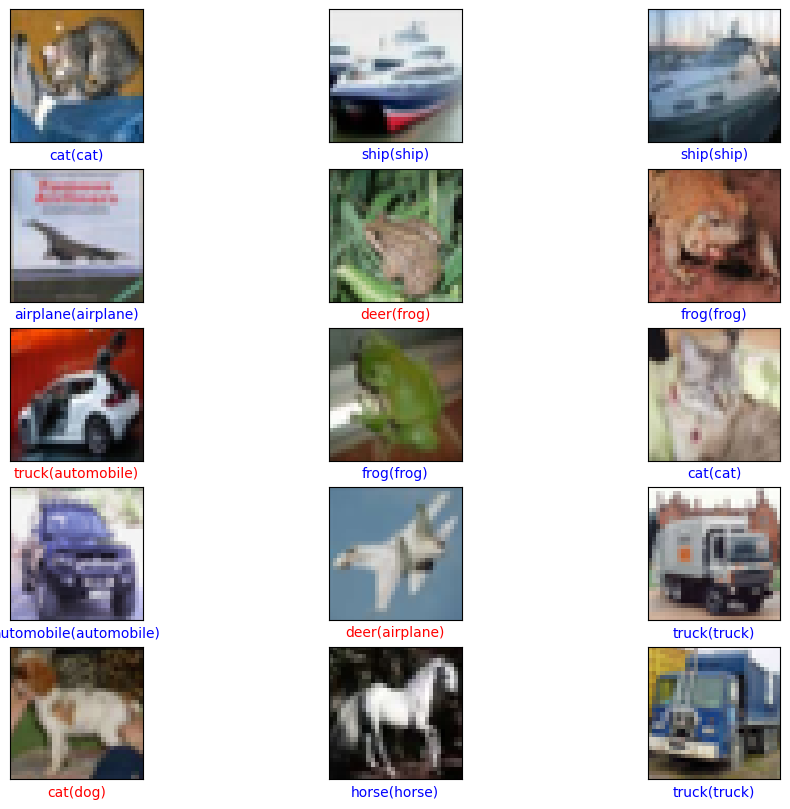

In [16]:
import numpy as np

predictions = model.predict(test_images)



num_rows, num_cols = 5 ,3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]}({class_names[true_label]})",color=color)
plt.show()

In [17]:
from tensorflow.keras.models import load_model

model.save('cnn_10_epochs.h5')